# CreateSimilarityMeasures
 - Use a CSV file and get information to create similarity measures

In [19]:
# Render our plots inline
%matplotlib inline

from requests import get
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from pandas.io.json import json_normalize


In [20]:
raw_data = pd.read_csv('./data/used_cars.csv')
raw_data

,caseID,Body,CCM,Car Code,Color,Doors,Gas,Manufacturer,Miles,Model,Power,Price,Speed,Year,ZIP
0,441_audi,sedan,2800,441,violet,4,gasoline,audi,29897,a6_2.8,193,49899,213,1995,8
1,108_audi,station_wagon,1600,108,turquoise,5,gasoline,audi,43858,a4_1.6,101,24699,183,1994,8
2,931_mercedes-benz,station_wagon,3200,931,gray,5,gasoline,mercedes-benz,32855,e_320,224,60799,241,1996,4
3,100_mercedes-benz,sedan,3000,100,yellow,4,diesel,mercedes-benz,18146,e_300_diesel,176,58499,224,1996,3
4,223_bmw,sedan,3500,223,dark_green,4,gasoline,bmw,24711,m3,320,73299,241,1997,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,700_bmw,station_wagon,2000,700,orange,5,gasoline,bmw,186068,520i,150,12099,183,1994,1
952,348_vw,fastback,1800,348,gray,2,gasoline,vw,70014,golf,100,16199,183,1995,3
953,331_mercedes-benz,sedan,2800,331,yellow,4,gasoline,mercedes-benz,21429,c_280,197,50199,213,1997,6
954,722_vw,fastback,1800,722,dark_red,2,gasoline,vw,25412,golf,100,17899,183,1994,2


In [21]:
def plot_numeric_box(plot_data, attribute, title):
    if(plot_data[attribute].min()>-100):
        ax = sns.boxplot(plot_data[attribute])
        #ax = sns.swarmplot(plot_data[attribute], color=".25")
        ax.set(xlabel=attribute, title=title + ' Boxplot (n='+ plot_data[[attribute]].dropna().__len__().__str__()+' (of ' + plot_data[[attribute]].__len__().__str__() +'))')
    
def plot_symbolic(plot_data, attribute, title):
    if(plot_data[attribute].isnull().sum() != plot_data.caseID.count()):
        ax = sns.countplot(x=attribute, data=plot_data)
        ax.set(xlabel=attribute, ylabel='Dist', title=title + ' Distribution (n='+ plot_data[[attribute]].dropna().__len__().__str__()+' (of ' + plot_data[[attribute]].__len__().__str__() +'))')
    

/opt/homebrew/Caskroom/miniforge/base/envs/py-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


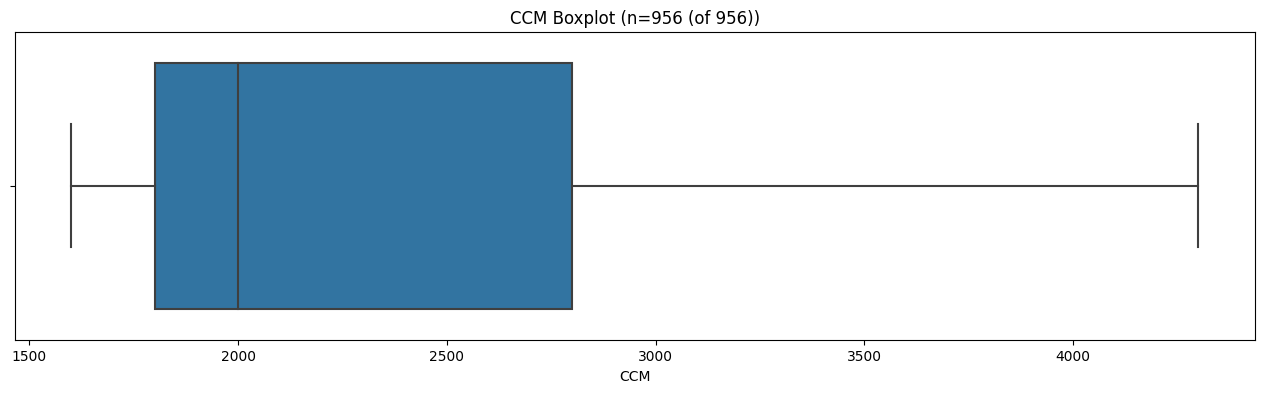

In [22]:
plt.rcParams["figure.figsize"] = (16, 4)
plot_numeric_box(raw_data, 'CCM', 'CCM')

In [23]:
def get_ranges_numeric(df, attribute):
    a_min= df[[attribute]].min()[0]
    a_max= df[[attribute]].max()[0]
    q1 = df[[attribute]].quantile(0.25)[0]
    q3 = df[[attribute]].quantile(0.75)[0]
    
    print('min-max: [{},{}]'.format(a_min, a_max))
    print('0.3 sim:', q3-q1)
    
    return (a_min, a_max, q3-q1)

def get_ranges_symbolic(df, attribute):
    print('values for:', df.value_counts(attribute))

In [24]:
att_min, att_max, sim_03 = get_ranges_numeric(raw_data, 'CCM')

min-max: [1600,4300]
0.3 sim: 1000.0


In [25]:
att_min, att_max, sim_03 = get_ranges_numeric(raw_data, 'Price')

min-max: [4799,95199]
0.3 sim: 19525.0


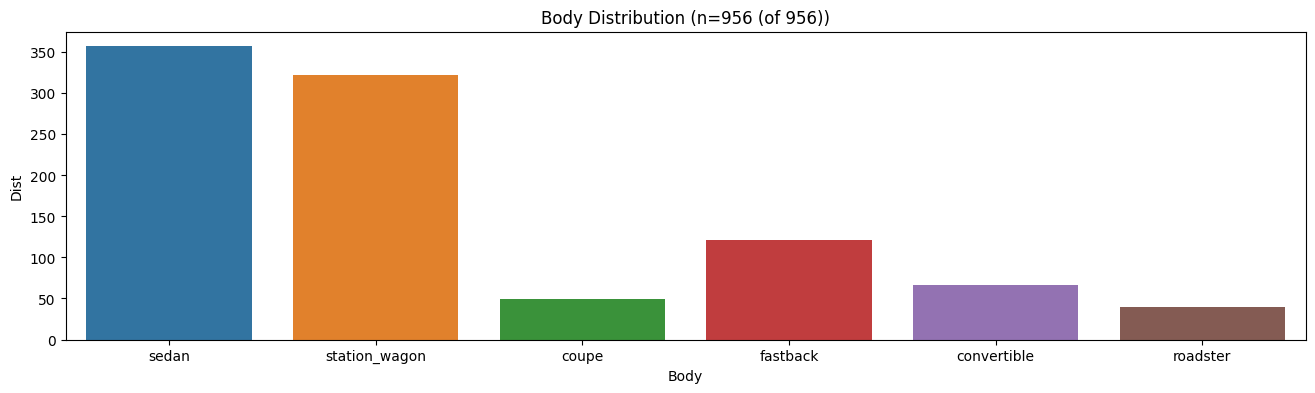

In [27]:
plot_symbolic(raw_data, 'Body', 'Body')

In [28]:
get_ranges_symbolic(raw_data, 'Body')

values for: Body
sedan            357
station_wagon    322
fastback         121
convertible       67
coupe             49
roadster          40
dtype: int64
